### HW10, SQL ALCHEMY, SURFS UP

#### Findings:
* Overall, there isn't a strong pattern in precipitation amounts throughout the year
* It looks like the middle of the chart has the least number of spikes in precip, which would be February
* Dates chosen: Feb 1-10

In [1]:
# dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

#### Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [8]:
# look at the columns and data types in each table

inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

engine.execute('SELECT * FROM measurement LIMIT 20').fetchall()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0)]

In [9]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
    
engine.execute('SELECT * FROM station LIMIT 20').fetchall()

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

#### Precipitation Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

('2017-08-23',)
2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).\
    group_by(Measurement.date).\
    all()
results

[('2016-08-24', 1.45),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.01),
 ('2016-08-27', None),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.01),
 ('2016-09-02', 0.03),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.44),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.15),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.23),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.33),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.05),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.81),
 ('2016-10-06', 0.

In [12]:
# Save the query results as a Pandas DataFrame, set the index to the date column, sort by date

results_df = pd.DataFrame(results, columns=['date', 'precipitation'])
results_df.set_index('date').sort_values(by = 'date', ascending=True).head(10)

,precipitation
date,
2016-08-24,1.45
2016-08-25,0.11
2016-08-26,0.01
2016-08-27,NaN
2016-08-28,2.07
2016-08-29,0.90
2016-08-30,0.05
2016-08-31,2.46
2016-09-01,0.01


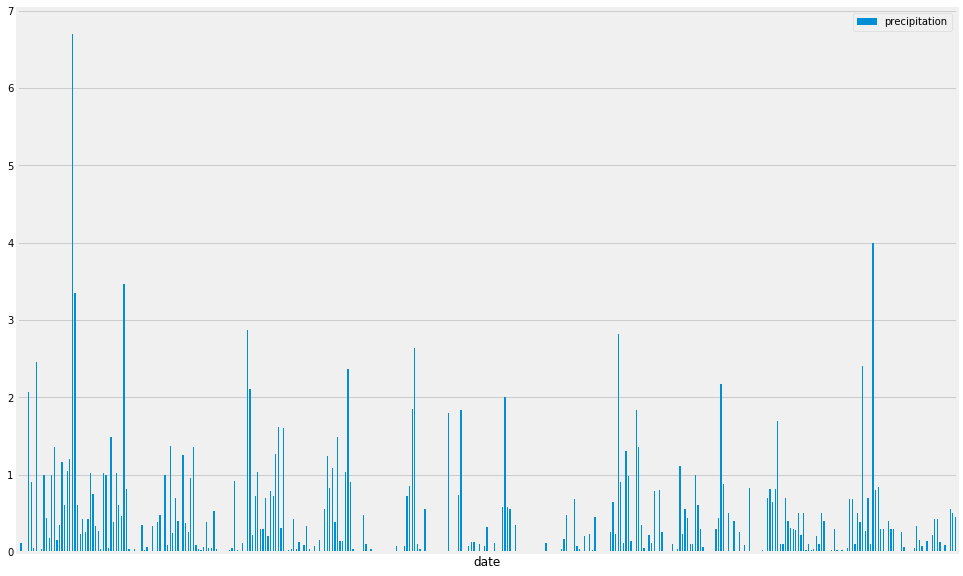

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot.bar(figsize=(15,10))
plt.xlabel("date")
plt.xticks([])
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pd.DataFrame.describe(results_df)

,precipitation
count,344.000000
mean,0.431308
std,0.705240
min,0.000000
25%,0.010000
50%,0.140000
75%,0.565000
max,6.700000


#### Station Analysis

In [15]:
# Design a query to show how many stations are available in this dataset
session.query(func.count(Station.station)).all()

[(9)]

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.tobs)).\
    filter(Measurement.date > last_year).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).\
    all()
station_activity

[('USC00519397', 360),
 ('USC00519281', 351),
 ('USC00516128', 348),
 ('USC00513117', 342),
 ('USC00519523', 336),
 ('USC00514830', 304),
 ('USC00517948', 182)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station

print(f'Lowest temperature is {session.query(func.min(Measurement.tobs)).first()}')
print(f'Highest temperature is {session.query(func.max(Measurement.tobs)).first()}')
print(f'Lowest temperature is {session.query(func.avg(Measurement.tobs)).first()}')

Lowest temperature is (53.0,)
Highest temperature is (87.0,)
Lowest temperature is (73.09795396419437,)


In [18]:
station_temps = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date > last_year).\
    filter(Measurement.station == 'USC00519397').\
    all()
station_temps

[('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 76.0),
 ('USC00519397', 76.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 81.0),
 ('USC00519397', 77.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 82.0),
 ('USC00519397', 81.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397',

In [19]:
station_temps_df = pd.DataFrame(station_temps, columns=['station', 'tobs'])
station_temps_df.head()

,station,tobs
0,USC00519397,79.0
1,USC00519397,80.0
2,USC00519397,79.0
3,USC00519397,77.0
4,USC00519397,78.0


Text(0,0.5,'Frequency')

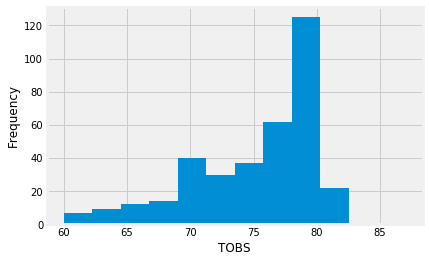

In [20]:
plt.hist(station_temps_df['tobs'], bins=12)
plt.xlabel("TOBS")
plt.ylabel("Frequency")